# <center> Bài tập Thực hành môn Nhập môn Máy học </center>

### **Họ và tên:** Huỳnh Nguyễn Thế Dân
### **MSSV:** 21110256
### **Lớp:** 21TTH1

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

## Load Dataset

In [1]:
#import library
import pandas as pd # pandas
import numpy as np # numpy
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    display(df.info())
    return df

In [3]:
PATH = "heart.csv" # Path to your file

df = read_dataset(PATH)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


None

In [4]:
df.shape

(886, 14)

## Exploratory Data Analysis

In [5]:
continous_columns = []
categories_columns = []

for col in df.columns:
    if df[col].nunique() > 5:
        continous_columns.append(col)
    else:
        categories_columns.append(col)

In [6]:
for col in categories_columns:
    df[col] = df[col].astype(str)

In [7]:
categories_columns.remove('target')

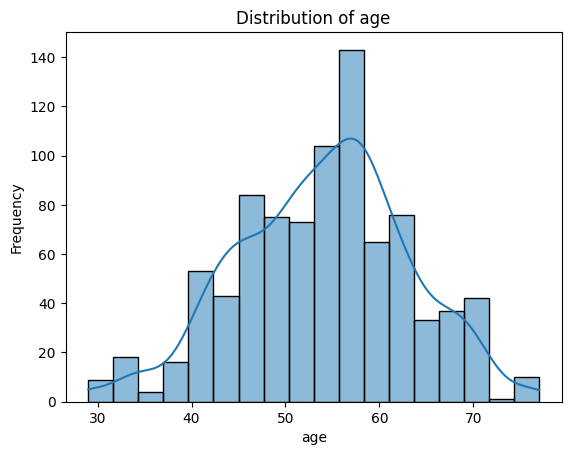

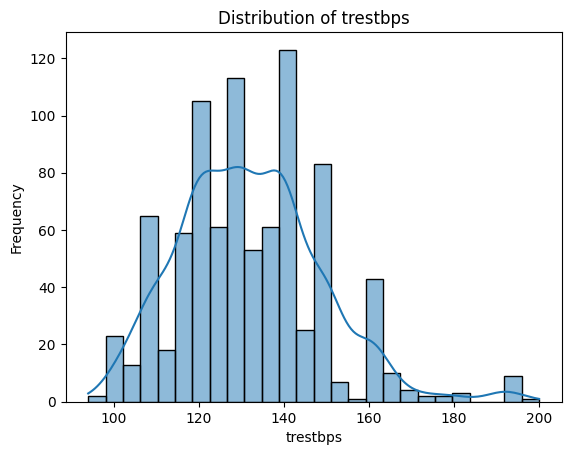

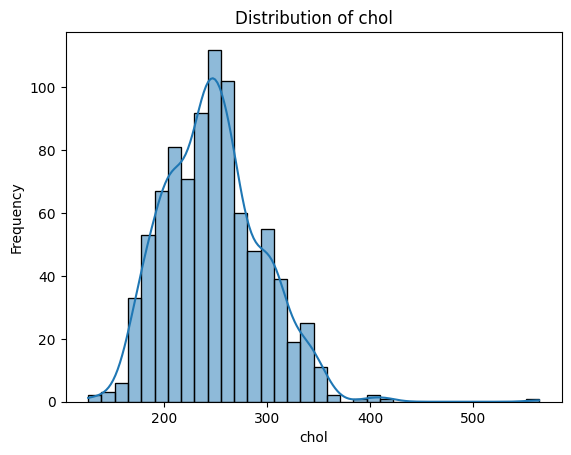

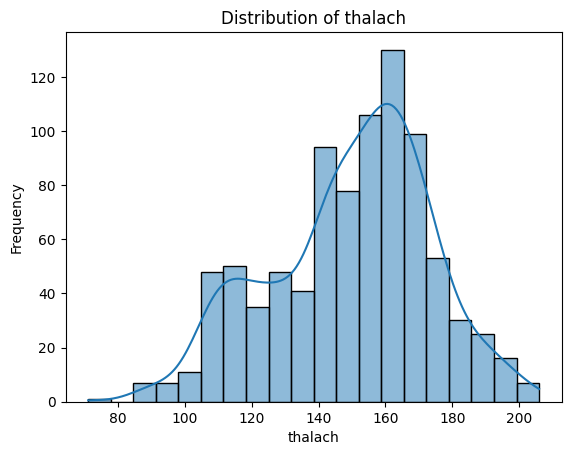

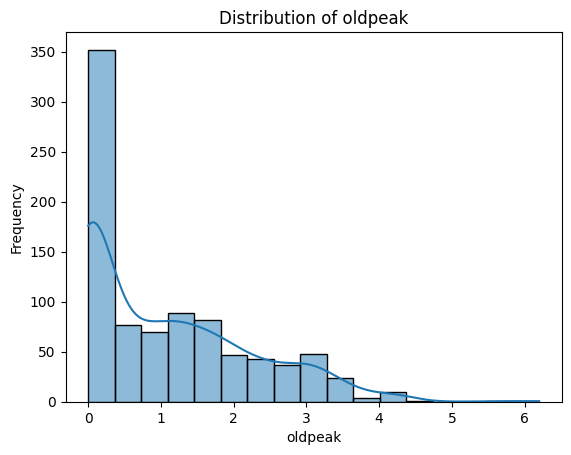

In [8]:
for col in continous_columns:
    sns.histplot(x=col, data=df, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

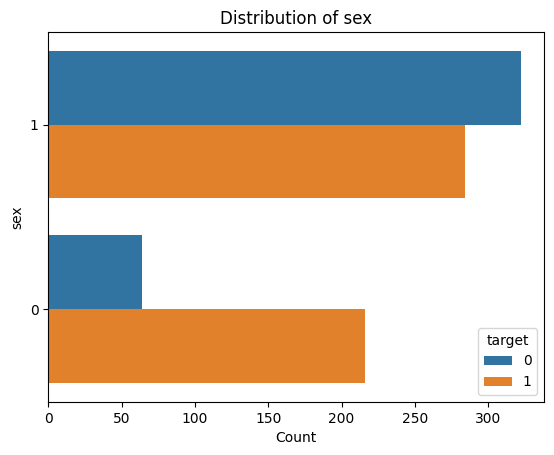

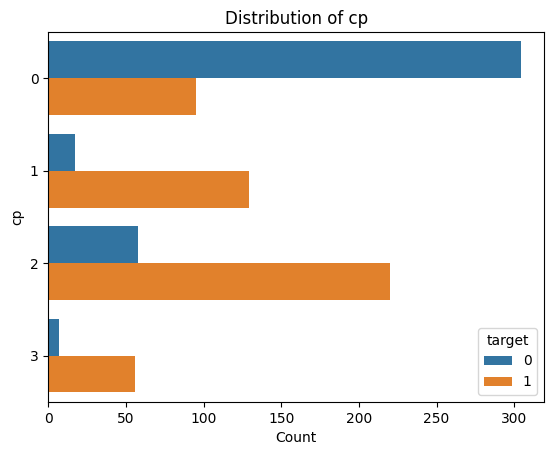

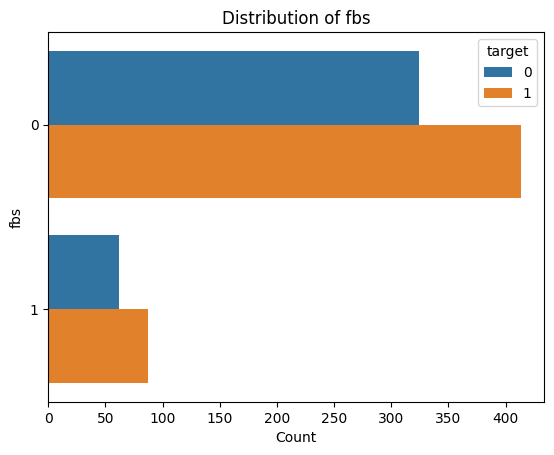

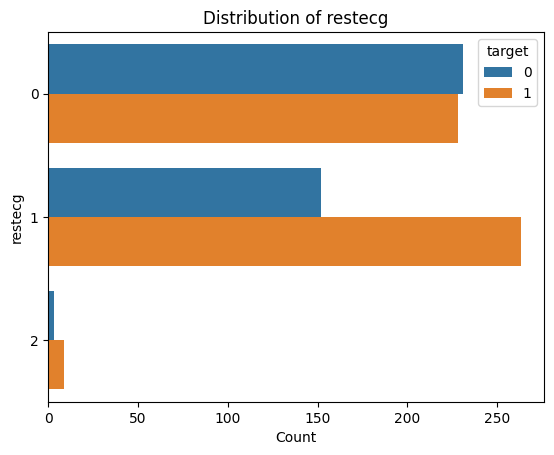

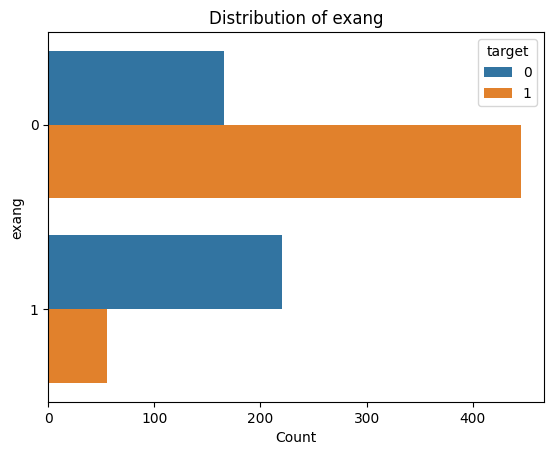

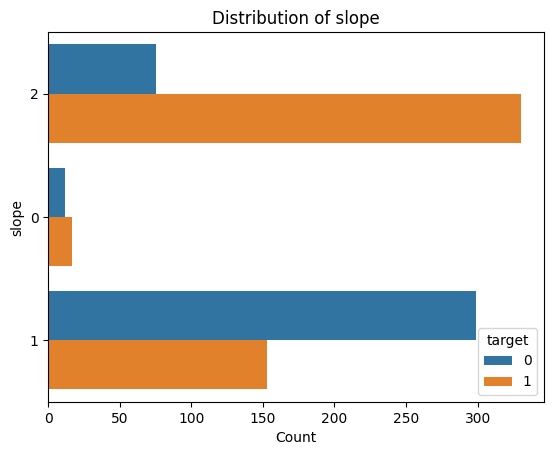

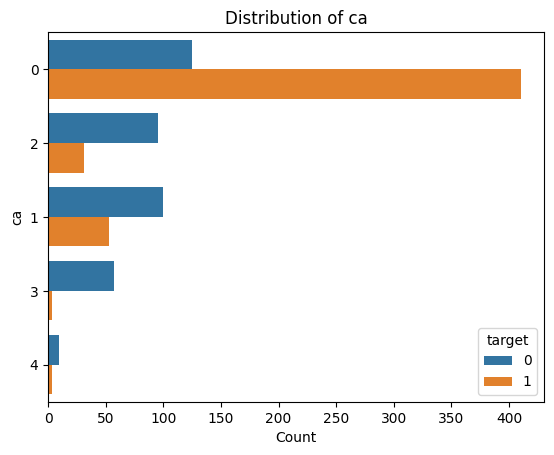

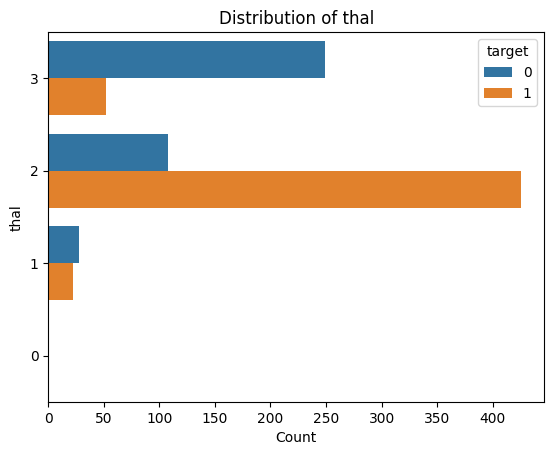

In [9]:
for col in categories_columns:
    sns.countplot(y=col, data=df, hue='target')
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
    plt.xlabel('Count')
    plt.show()

<Axes: xlabel='target', ylabel='count'>

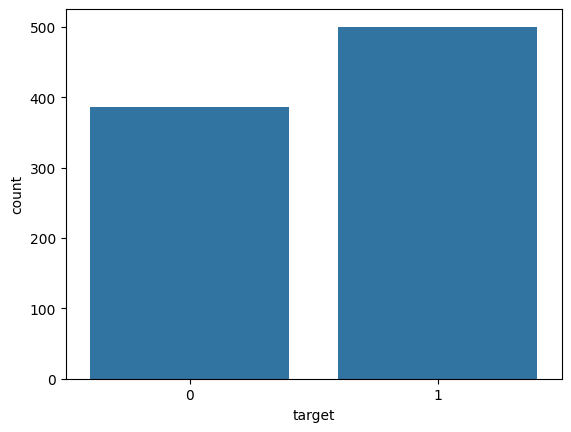

In [10]:
sns.countplot(x='target', data=df)

## Preprocessing

In [11]:
# Null checking
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# Duplicate checking
df.duplicated().sum()

0

In [13]:
def preprocessing_data(df):
    df.fillna(df.mean, inplace= True)
    return df

In [14]:
preprocessing_data = preprocessing_data(df.copy())

display(preprocessing_data.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


## Feature Engineering

<Axes: >

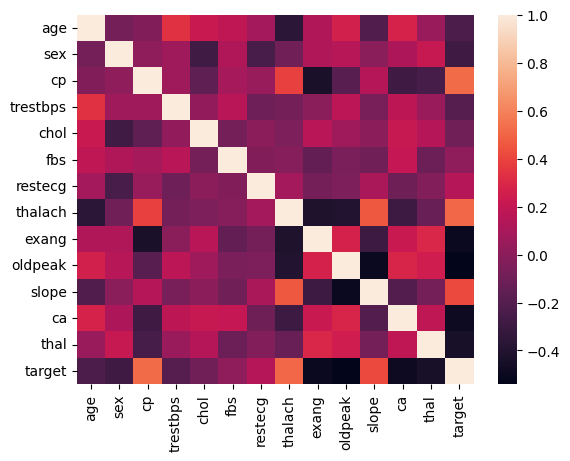

In [15]:
sns.heatmap(df.corr()) # Show heatmap before normalized data

In [16]:
def apply_feature_engineering(df):
    temp = pd.get_dummies(df[categories_columns])
    df.drop(categories_columns, axis=1, inplace=True) # Remove category columns
    df = pd.concat([df, temp], axis=1) # nối dataframe data với các giá trị dummy của feature col
    return df

In [17]:
processed_df = apply_feature_engineering(df.copy())
processed_df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,46,120,249,144,0.8,0,False,True,True,False,...,True,True,False,False,False,False,False,False,False,True
1,71,160,302,162,0.4,1,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
2,71,160,303,163,0.4,1,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
3,71,160,304,164,0.4,1,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
4,71,160,305,165,0.4,1,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False


# Apply machine learning model

In [18]:
def prepare_X_y(df):

    X = df.drop('target', axis=1, inplace=False).values

    y = df['target']
    y = np.array([0 if i=='0' else 1 for i in y])
    y = y.reshape((-1, 1))
    return X, y

X, y = prepare_X_y(processed_df)

## Train-test split

In [20]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 2024
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Định nghĩa grid của các siêu tham số
param_grid = {
    'C': [0.1, 1, 10],
    'class_weight': [None, 'balanced'],
    'max_iter': [20000, 30000, 40000],
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Tạo một GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Huấn luyện GridSearchCV trên dữ liệu
grid_search.fit(trainX, trainY.ravel())

# Truy cập các giá trị tốt nhất của các siêu tham số
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'C': 10, 'class_weight': None, 'max_iter': 20000, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}


In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def build_model(X, y):
    # Tạo một pipeline bao gồm việc chuẩn hóa dữ liệu và mô hình Logistic Regression
    model = make_pipeline(StandardScaler(), LogisticRegression(C = 10, class_weight= None, max_iter= 20000, penalty='l2', solver='liblinear'))
    # Huấn luyện mô hình trên dữ liệu đầu vào X và nhãn y
    model.fit(X, y.ravel())
    return model

model = build_model(trainX, trainY)

y_pred = model.predict(testX)

In [39]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
def calculate_performance(y_true, y_pred):

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)

    print('--------------------------------')
    main_score = accuracy
    print("The main score is Accuracy: ", accuracy)

    
performance = calculate_performance(testY, y_pred)

Precision: 0.9447852760736196
Recall: 0.9390243902439024
Accuracy: 0.9285714285714286
F1 Score: 0.9418960244648318
--------------------------------
The main score is Accuracy:  0.9285714285714286


In [37]:
report = classification_report(testY, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       102
           1       0.94      0.94      0.94       164

    accuracy                           0.93       266
   macro avg       0.92      0.93      0.92       266
weighted avg       0.93      0.93      0.93       266



In [48]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return  "7. \n" \
            "I use F1-score to evaluate because I think it is suitable for evaluating and diagnosing heart disease because if the disease is not properly diagnosed, it will have high consequences.\n"\
            "I use GridSearchCV to find the penalty = l2 and solver = liblinear hyperparameters, respectively."

In [49]:
print(get_conclusion())

7. 
I use F1-score to evaluate because I think it is suitable for evaluating and diagnosing heart disease because if the disease is not properly diagnosed, it will have high consequences.
I use GridSearchCV to find the penalty = l2 and solver = liblinear hyperparameters, respectively.
